<a href="https://colab.research.google.com/github/Alven8816/DEEPER_with_R_workshop_20220908/blob/main/DEEPER_R_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep ensemble machine learning (DEML) for estimating environmental exposure - Session 2**

Wenhua(Alven) Yu

# R package 'deeper' install

Before installation, please make sure:

-   using R (\>= 3.5.0)

-   installed certain dependent R packages: devtools, SuperLearner(\>= 2.0-28)

-   installed other suggested R packages: caret, skimr, CAST, ranger, gbm, xgboost, (nnls, foreach,splines, gam)


The developing version of deeper can be found from [github](https://github.com/Alven8816/deeper).

Using the following syntax to install:

``` {.r}
library(devtools)
install_github("Alven8816/deeper")
```

In [3]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
install.packages("SuperLearner")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘iterators’, ‘gplots’, ‘foreach’, ‘ROCR’, ‘nnls’, ‘gam’, ‘cvAUC’




In [5]:
library(devtools)

Loading required package: usethis



In [7]:
install_github("Alven8816/deeper")


* checking for file ‘/tmp/RtmpcaRnnS/remotes48f5b2cea/Alven8816-deeper-9d3fd21/DESCRIPTION’ ... OK
* preparing ‘deeper’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘deeper_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(deeper)

Loading required package: SuperLearner

Loading required package: nnls

Loading required package: gam

Loading required package: splines

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loaded gam 1.20.2


Super Learner

Version: 2.0-28

Package created on 2021-05-04



Attaching package: ‘deeper’


The following object is masked from ‘package:stats’:

    predict




## Activity

Install deeper R package.

# The advantage of DEML

* Outstanding model performance. DEML is an extension of a SuperLearner(SL) ensemble algorithm (Naimi and Balzer 2018; Polley and Van Der Laan 2010; Van der Laan et al. 2007) by introducing the neural network hierarchy structure. Generally, it achieved higher estimation accuracy than SL and other single ML models. 

* Assessing constructed individual models simultaneously. DEML can evaluate the performance of all constructed individual models simultaneously and generate the optimal weights for each model.

* Customizing diverse hierarchy structure and algorithms. You can modify the structure of DEML and achieve the best one for your tasks.

* Minimizing errors from empirical experience. DEML not only evaluates the performance of all constructed models simultaneously but also automatically selects an optimal integration, as well as the selection of hyper-parameters.

* Easy to use and extent. You do not need to have a high-steep learning curve to learn how it works.


The details about the DEML can be found [here](https://ehp.niehs.nih.gov/doi/full/10.1289/EHP9752). 


# The DEML framework

![framework](https://ehp.niehs.nih.gov/cms/asset/5ddec431-0e9c-45a0-a4d4-756370dc6a70/ehp9752_f1.jpg)

The DEML framework proposed above is a three-level stacked ensemble approach. It is based on the SuperLearner(SL) ensemble algorithm (Naimi and Balzer 2018; Polley and Van Der Laan 2010; Van der Laan et al. 2007) introduced in the neural network hierarchy structure.

# Basic steps for DEML

* **Step 1.  Data preparation**

Including data collection, data clean, setting trianing and testing dataset, and independent variables selection.

**Note: DEML could not directly deal with missing values and missing value imputation technologies is recommended prior to the use of the DEML model.**

    
* **Step 2.  Establish base models**

Using predictModel() or predictModel_parallel() to establish the base models. A tuningModel() function can be used to tuning the parameters to get the best single base model.

* **Step 3.  Stacking meta models**

We use stack_ensemble(),stack_ensemble.fit(), or stack_ensemble_parallel() function to stack the meta models to get a DEML model.


* **Step 4.  Prediction based on new data set**

After establishment of DEML model, the predict() can be used predict the unseen data set.

To assess the performance of the models, assess.plot() can be used by comparing the original observations (y in test set) and the prediction. The assess.plot() also return the point scatter plot.


# Algorithms selection

In [19]:
data(model_list)
print(model_details)

# A tibble: 35 × 4
   parameter          algorithm                                  require…¹ types
   <chr>              <chr>                                     <chr>      <chr>
 1 SL.bayesglm        Bayesian generalized linear regression    arm        R    
 2 SL.biglasso        Extending Lasso Model Fitting to Big Data biglasso   R    
 3 SL.caret           random Forest as default                  caret      R    
 4 SL.caret.rpart     decision trees as default                 caret      R    
 5 SL.cforest         Breiman's random forests                  party      R    
 6 SL.earth           Multivariate Adaptive Regression Splines  earth      R    
 7 SL.gam             generalized additive models               gam        N    
 8 SL.gbm             generalized boosting algorithm            gbm        R    
 9 SL.glm             generalized linear models                 NA         R    
10 SL.glm.interaction generalized linear models                 NA         R    
# … with 

In the 'type' column, "R": can be used for regression or classification;"N": can be used for regression but variables require to be numeric style; "C": just used in classification.


# Example

*To estimate the daily ambient PM2.5 in the northeast of China in 2015-2016*

## 1.Data preparation

In [10]:
#install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(pacman)
p_load("ranger","CAST","caret","skimr","gbm","xgboost","hexbin")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’



ranger installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘caret’, ‘reshape’, ‘FNN’, ‘plyr’, ‘zoo’



CAST installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


skimr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gbm installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


xgboost installed



In [ ]:
# load library
#library(ggplot2)
#library(caret)
#library(skimr)
#library(CAST)
#library(SuperLearner)
#library(ranger)

In [12]:
data("envir_example")

knitr::kable(head(envir_example))



|date      |code  |year |month |week |     PM2.5|     c_AOD|      TEMP|        AP|       RH| elevation|        WS| a_buffer10|
|:---------|:-----|:----|:-----|:----|---------:|---------:|---------:|---------:|--------:|---------:|---------:|----------:|
|2/01/2015 |1001A |2015 |1     |5    |  51.26087| 0.2191133| -2.757819| 1012.1792| 30.50154|        45| 1.6981146|         68|
|3/01/2015 |1001A |2015 |1     |6    | 154.04167| 0.9245346| -3.757023| 1000.7333| 43.59143|        45| 0.9536832|         68|
|4/01/2015 |1001A |2015 |1     |0    | 151.91667| 0.3927248| -1.298150|  999.6592| 43.22169|        45| 1.3580554|         68|
|6/01/2015 |1001A |2015 |1     |2    |  39.54545| 0.3009302| -2.218822| 1010.8966| 20.39437|        45| 2.7473587|         68|
|8/01/2015 |1001A |2015 |1     |4    | 148.38095| 1.0532465| -3.522646| 1012.8126| 54.77821|        45| 1.1803217|         68|
|9/01/2015 |1001A |2015 |1     |5    |  87.78261| 0.1762094| -1.593402| 1011.9749| 37.70417|        45| 2.180

## 1.1 Data clean

The basic data clean strategies include:

1.  Variable type setting

2.  Extreme value (outliers) detection

3.  Missing value operation (imputation, drop)

4.  Data transforming (normalization/standardization, eg. scale, centralize,log-transform and others)

``` {.r}
# skim the data missing value and distribmution
skimr::skim(envir_example)
```


In [13]:
dis_test <- skimr::skim(envir_example)

print(head(dis_test,10))

── Data Summary ────────────────────────
                           Values       
Name                       envir_example
Number of rows             2970         
Number of columns          13           
_______________________                 
Column type frequency:                  
  character                1            
  factor                   4            
  numeric                  5            
________________________                
Group variables            None         

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 date                  0             1   9  10     0      501          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 code                  0             1 FALSE          7
2 year                  0             1 FALSE          2
3 month                 0

$character

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 date                  0             1   9  10     0      501          0

$factor

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts             
1 code                  0             1 FALSE          7 100: 436, 100: 432, 10…
2 year                  0             1 FALSE          2 201: 1511, 201: 1459   
3 month                 0             1 FALSE         12 3: 316, 1: 309, 4: 289…
4 week                  0             1 FALSE          7 2: 445, 4: 439, 1: 435…

$numeric

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_…¹ n_mis…² compl…³    mean     sd       p0     p25     p50     p75   p100
1 PM2.5         0       1  70.9   65.2     4.62    23.9    52.3   9.79e+1 4.5 e2
2 c_AOD         0       1   0.674  0.673   0.0212   0.219   0.412 8.87e-1 3.56e0
3 TEMP          0       1  11.3   11.3   -12.1      0.114  12.7   2.19e+1 3.15e1
4 AP            0       1 995.    18.3   939.     989.    998.    1.01e+3 1.03e3
5 RH            0       1  50.6   17.3     9.73    37.1    50.2   6.50e+1 8.88e1
# … with 1 more variable: hist <chr>, and abbreviated variable names
#   ¹​skim_variable, ²​n_missing, ³​complete_rate

## 1.2 Data split

We randomly select 20% of the data as independent testing dataset, and the remainder were used as the training dataset.

The split strategy is based on the size of your sample as well as your question.

In [14]:
set.seed(1234) # to achieve a repeatable resultsm

size <-
  caret::createDataPartition(y = envir_example$PM2.5,
                             p = 0.8, list = FALSE)
trainset <- envir_example[size, ]
testset <- envir_example[-size, ]

Identify the dependence and independence variables

In [15]:
y <- c("PM2.5")
x <- colnames(envir_example[-c(1, 6)]) # except "date" and "PM2.5"

# Challenging 1

Q: Estimate annual average NO2 in Sydney in 2005-2018

Download the Sydney NO2 data in the [CloudStor](https://www.aarnet.edu.au/cloudstor)

Tasks:

1.  Setting the dependence ("no2_annual") and others as independent variables

2.  Split 10% of data as testing data set

```r
#try it here
```

## 2. Establish base models

## 2.1 Single base model training

Q: How to select the best parameter for a single base model?


We can set or adjust the parameters of a base model using 'tuningModel' function.


In [16]:
ranger <-
  tuningModel(
    basemodel  = 'SL.ranger',
    params = list(num.trees = 100),
    tune = list(mtry = c(1, 3, 7))
  )

Here we will train a Random Forest (RF) model with the specific parameters and using 5-fold Cross validation (CV) to assess the model performance.

In [17]:
# training the RF model with different parameters simultaneously

start_time <- Sys.time()
model1 <-
  predictModel(
    Y = trainset[, y],
    X = trainset[, x],
    base_model = c(ranger),
    cvControl = list(V = 5)
  )
end_time <- Sys.time()
end_time - start_time
#print(model1$base_ensemble_value)



The base models Cross validation result:

       SL.ranger_1_All SL.ranger_2_All SL.ranger_3_All
weight       0.0000000       0.3004660       0.6995340
R2           0.7978256       0.8749765       0.8752692
RMSE        35.2163342      23.8228438      23.2379626


Time difference of 6.310799 secs

The results show the weight, R2, and the root-mean-square error (RMSE) of each model. "ranger_1","ranger_2","ranger_3" note the Random Forest model with parameters mtry = 1,3,7 separately.

The training results show that 'mtry = 7' could achieve a better RF model performance.

## 2.2 Model prediction

After training a base ML model, we can use it to estimate the independent testing dataset by using 'predict' function.

**Note: 'predict()'function was recommended to limit its sources (namespace) to reduce the conflict with other R package such as stats::predict()**

In [18]:
# compare the model performance in the independent testing dataset
pred_model1 <- deeper::predict(object = model1, newX = testset[, x])

base_model_output <- pred_model1$pre_base$library.predict

print(head(base_model_output))

     SL.ranger_1_All SL.ranger_2_All SL.ranger_3_All
[1,]        52.90729        47.68343        48.09790
[2,]        61.50432        66.76404        67.36444
[3,]        68.93616        77.79895        62.86596
[4,]        66.66083        73.91816        77.26067
[5,]       147.77336       177.64796       174.72512
[6,]        56.60838        51.01905        49.36100


In [19]:
# calculate model performance in testing dataset
print(apply(
  X = pred_model1$pre_base$library.predict,
  MARGIN = 2,
  FUN = caret::R2,
  obs = testset[, y]
))

SL.ranger_1_All SL.ranger_2_All SL.ranger_3_All 
      0.7843890       0.8562903       0.8780889 


After examine the model performance in an independent testing dataset, we may finally select the RF model with mtry = 7 as the best parameters.


# Challenging 2

Tasks:

1.  Establish a Random Forest model with parameter: mtry = 7 and leave others as default

2.  Establish another base model 'xgboost' simultaneously by setting base_model = "SL.xgboost"

```r
#try it here
```

## 2.3 Establish base model with parallel computing

Considering the time-consuming of running several base models simultaneously, we can select using parallel computing to help improve the computational efficiency.

We can identify the index in the cross validation(CV) to conduct the spatial (cluster) or temporal CV

In [21]:
# there are 7 stations in the trainset
unique(trainset$code) 
# Create a list with 7 (folds) elements (each element contains index of rows to be considered on each fold)

## conduct the spatial CV
indices <-
  CAST::CreateSpacetimeFolds(trainset, spacevar = "code", k = 7)

# Rows of validation set on each fold

v_raw <- indices$indexOut
names(v_raw) <- seq(1:7)

start_time <- Sys.time()

model2 <- predictModel_parallel(
  Y = trainset[, y],
  X = trainset[, x],
  base_model = c("SL.xgboost", "SL.ranger"),
  cvControl = list(V = length(v_raw), validRows = v_raw),
  #number_cores = 2,
  seed = 1234
)
end_time <- Sys.time()
end_time - start_time
## when number_cores is missing, it will indicate user to set one based on the operation system.

#You have 2 cpu cores, How many cpu core you want to use:
# type the number to continue the process.

[1] 1001A 1002A 1003A 1004A 1005A 1006A 1007A
Levels: 1001A 1002A 1003A 1004A 1005A 1006A 1007A

You have 2 cpu cores, How many cpu core you want to use:2


The base models Cross validation result:

       SL.xgboost_All SL.ranger_All SL.predict
weight      0.3691117     0.6308883  1.0000000
R2          0.8596721     0.8776917  0.9884692
RMSE       24.3083180    23.5063538  7.6983371


Time difference of 38.31619 secs

In [22]:
# prediction for testing dataset
pred_model2 <- deeper::predict(object = model2, newX = testset[, x])

## 3. Stacking meta models

After assessing the performances of base models, we now can move forward to the DEML by stacking meta models on it.

In [23]:
#Do include original feature
#object do not include newX dataset

## the training results
model3_stack <-
  stack_ensemble(
    object = model1,
    meta_model = c("SL.ranger", "SL.xgboost", "SL.glm"),
    original_feature = FALSE,
    #X = trainset[, x]
  )
#model3_stack$stack_ensemble_value

# Independent testing results
model3_DEML <-
  deeper::predict(object = model3_stack, newX = testset[, x])

print(apply(
  X = cbind(model3_DEML$pre_meta$library.predict,
        model3_DEML$pre_meta$pred),
  MARGIN = 2,
  FUN = caret::R2,
  obs = testset[, y]
))

print(apply(
  X = cbind(model3_DEML$pre_meta$library.predict,
        model3_DEML$pre_meta$pred),
  MARGIN = 2,
  FUN = caret::RMSE,
  obs = testset[, y]
))


The meta models cross validation results:

       SL.ranger_All SL.xgboost_All SL.glm_All
weight     0.1609953      0.0000000  0.8390047
R2         0.8721844      0.8493951  0.8817140
RMSE      23.2086224     25.3734428 22.2990132
 SL.ranger_All SL.xgboost_All     SL.glm_All                
     0.8646105      0.8537735      0.8738125      0.8737757 
 SL.ranger_All SL.xgboost_All     SL.glm_All                
      24.55508       25.59143       23.70075       23.70519 


## 3.1 Stacked meta models from scratch

We can create DEML directly by setting the base models and meta models. But considering the unknown impact of the underlying model and computation time, this is not recommended.

In [24]:
model4_stack <-
  stack_ensemble.fit(
    Y = trainset[, y],
    X = trainset[, x],
    base_model = c("SL.xgboost", ranger),
    meta_model = c("SL.ranger", "SL.xgboost", "SL.glm"),
    original_feature = FALSE
  )



The base models Cross validation result:

       SL.xgboost_All SL.ranger_1_All SL.ranger_2_All SL.ranger_3_All
weight      0.5111480       0.0000000       0.2083632       0.2804888
R2          0.8842027       0.8064991       0.8844144       0.8836428
RMSE       22.0787282      34.3584877      22.8970789      22.4256136

The meta models cross validation results:

       SL.ranger_All SL.xgboost_All SL.glm_All
weight     0.2913335      0.0000000  0.7086665
R2         0.8914730      0.8713481  0.8971209
RMSE      21.3775480     23.3661136 20.7962194


## 3.2 Stacked meta models with paralleling computing

We also accelerate the calculation with paralleling computing in DEML. 

Several key points are worthy to note:

- If the base model used parallel computing, the meta-model also needs to be parallel.

- When setting a specific CV index, please be consistent in meta-model training.

- Do not use all of your computation cores to do paralleling. Leave at least one for your operating system.

- 'Original_feature' is optional. It may generally improve your model performance but increase the computational complexity.

In [32]:
#Do not include original feature

start_time <- Sys.time()
model5_stack <-
  stack_ensemble_parallel(
    object = model2,
    Y = trainset[, y],
    meta_model = c("SL.glm"),
    original_feature = FALSE,
    cvControl = list(V = length(v_raw), validRows = v_raw),
    number_cores = 4
  )
end_time <- Sys.time()
end_time - start_time
# the training results

# the testing results
pred_model5_stack <-
  deeper::predict(object = model5_stack, newX = testset[, x])

Your input cores is larger than 2, please set the CPU scores:2

The stack ensemble cross validation value:

       SL.glm_All     deeper
weight  1.0000000  1.0000000
R2      0.8731054  0.8807942
RMSE   23.0996965 22.3854647


Time difference of 4.338843 secs

# Challenging 3

Tasks:

1. Stacking meta models  using RF and Xgboost (with original features) in Sydeny data to conduct DEML model

2. Achieving the final DEML model performance in testing dataset

```r
#try it here
```


# Challenging 4

Download the Sydney NO2 data in the [CloudStor](https://www.aarnet.edu.au/cloudstor)

Task:

To estimate 10km grid cell yearly NO2 in Sydney.

```{r}
#try it here
```

## 4. Plot the results

We can finally have the scatter plot using 'assess.plot' function in deeper.

In [27]:
plot_DEML <-
  assess.plot(pre = model3_DEML$pre_meta$pred, obs = testset[, y])


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



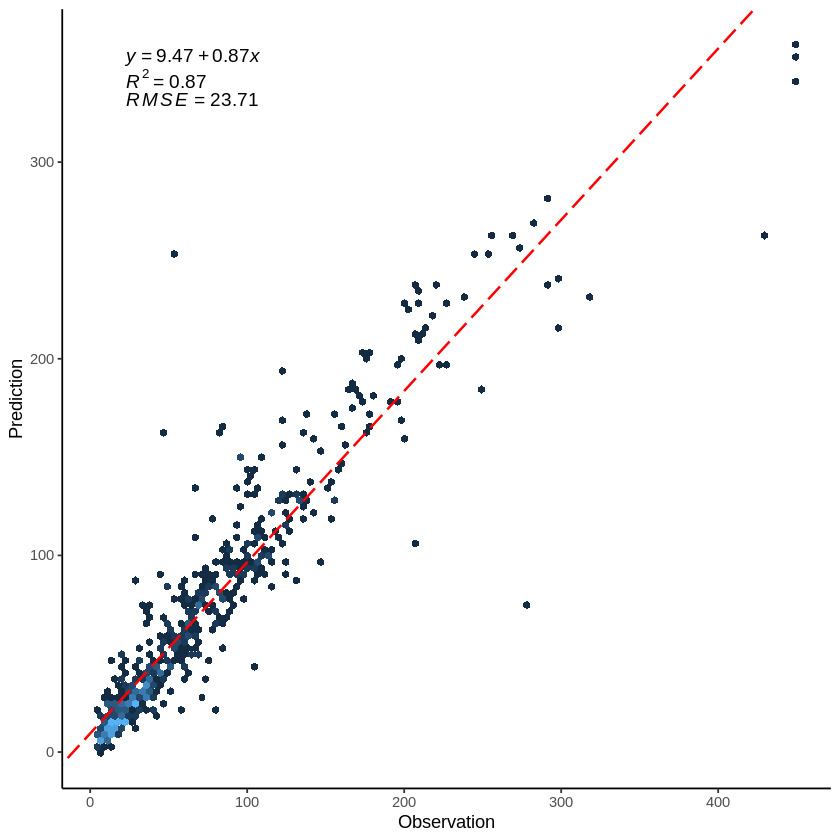

In [31]:
#install.packages("hexbin")
#library(hexbin)
plot_DEML$plot

## 5. Citation

Wenhua Yu, Shanshan Li, Tingting Ye,Rongbin Xu, Jiangning Song, Yuming Guo (2022) Deep ensemble machine learning framework for the estimation of PM2.5 concentrations,Environmental health perspectives: [https://doi.org/10.1289/EHP9752](https://doi.org/10.1289/EHP9752)